# Breast Cancer Data Analysis and Prediction


## Steps
### 1.Understanding the data
### 2.Data visualization
### 3.Prediction using knn algorithm
 


In [1]:
#import standard libraries
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt 
#graphs include to notebook
%matplotlib inline

In [6]:
#imports breast cancer data

df=pd.read_csv('Breast_cancer_data.csv')
df.shape

(569, 6)

In [9]:
df.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0


In [10]:
df.tail()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
564,21.56,22.39,142.00,1479.0,0.11100,0
565,20.13,28.25,131.20,1261.0,0.09780,0
566,16.60,28.08,108.30,858.1,0.08455,0
567,20.60,29.33,140.10,1265.0,0.11780,0
568,7.76,24.54,47.92,181.0,0.05263,1


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 6 columns):
mean_radius        569 non-null float64
mean_texture       569 non-null float64
mean_perimeter     569 non-null float64
mean_area          569 non-null float64
mean_smoothness    569 non-null float64
diagnosis          569 non-null int64
dtypes: float64(5), int64(1)
memory usage: 26.8 KB


## Data's column interpretation
#### diagnosis (set as target variable) : The diagnosis of breast tissues 1= positive (cancerous) 0= negative (not cancerous)
#### mean_radius: mean of tissue cell's radius
#### mean_texture: standard deviation of gray-scale values
#### mean_perimeter: mean size of tumor
#### mean_area: mean area of tumor
#### mean_smoothness: mean of local variation in radius lengths

In [13]:
#any nulls in the data?
df.isnull().sum()

mean_radius        0
mean_texture       0
mean_perimeter     0
mean_area          0
mean_smoothness    0
diagnosis          0
dtype: int64

## Turns out that we have no nulls, if we do, we either get rid of the nulls using drop command, or give meaning to the missing values by taking average of that specific column.

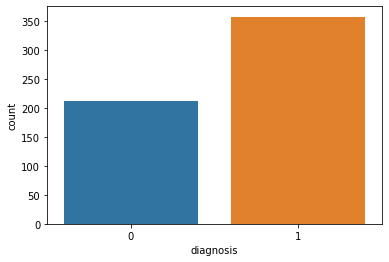

In [17]:
#distribution of diagnosis
sns.countplot(x='diagnosis', data=df)


### We see that this data has more diagnosed with cancer
### Let's look at how other columns are related to "DIAGNOSIS"

In [18]:
df.columns

Index(['mean_radius', 'mean_texture', 'mean_perimeter', 'mean_area',
       'mean_smoothness', 'diagnosis'],
      dtype='object')

In [19]:
#correlation
corrMatt = df[['mean_radius', 'mean_texture', 'mean_perimeter', 'mean_area', 'mean_smoothness', 'diagnosis']]
corrMatt = corrMatt.corr()
print(corrMatt)

mask = np.array(corrMatt)
mask[np.tril_indices_from(mask)] = False

                 mean_radius  mean_texture  mean_perimeter  mean_area  \
mean_radius         1.000000      0.323782        0.997855   0.987357   
mean_texture        0.323782      1.000000        0.329533   0.321086   
mean_perimeter      0.997855      0.329533        1.000000   0.986507   
mean_area           0.987357      0.321086        0.986507   1.000000   
mean_smoothness     0.170581     -0.023389        0.207278   0.177028   
diagnosis          -0.730029     -0.415185       -0.742636  -0.708984   

                 mean_smoothness  diagnosis  
mean_radius             0.170581  -0.730029  
mean_texture           -0.023389  -0.415185  
mean_perimeter          0.207278  -0.742636  
mean_area               0.177028  -0.708984  
mean_smoothness         1.000000  -0.358560  
diagnosis              -0.358560   1.000000  


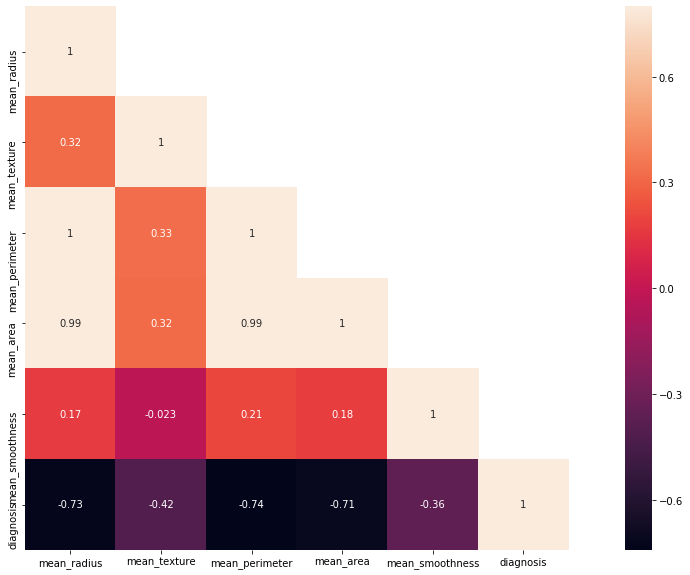

In [74]:
#correlation using heat map
fig, ax = plt.subplots()
fig.set_size_inches(20,10)

sns.heatmap(corrMatt, mask=mask,vmax=.8, square=True,annot=True)

# fix for bug that cuts off top/bottom of seaborn viz
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show()



#### We see that mean_texture and mean_perimeter is the most relevant correlation. (0.33)
#### Radius,area,parameter have almost 1 correlation but irrlevant.

In [79]:
#Adds another column: For target variable data as categorical using map function
#0 -> 'n'
#1 -> 'p'

df['target_v']= df['diagnosis'].map({0:'N',1:'P'})
feature=['mean_perimeter','mean_texture']

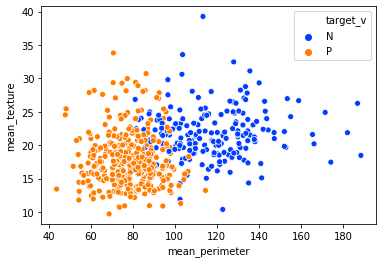

In [94]:
sns.scatterplot(x='mean_perimeter', y = 'mean_texture', data = df, hue = 'target_v', palette='bright');


### This is supervised ML, binary classifcation ( because we want to know whether it's cancerous or not cancerous) predict using KNN algorithm

In [160]:
from sklearn.model_selection import train_test_split


y_target = df['diagnosis']
train=['mean_perimeter','mean_texture']
X_train = df[train]

X_train, X_test, Y_train, Y_test = train_test_split(X_train,y_target,test_size=0.33, random_state = 42)




In [180]:
#import KNN
from sklearn.neighbors import KNeighborsClassifier
#import metrics model to check accuracy
from sklearn import metrics
from sklearn.metrics import accuracy_score
clf = KNeighborsClassifier()
clf.fit(X_train, Y_train)


k_range=range(1,25)
score={}
score_list=[]
for k in k_range:
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,Y_train)
    y_pred=knn.predict(X_test)
    score[k]=metrics.accuracy_score(Y_test,y_pred)
    score_list.append(metrics.accuracy_score(Y_test,y_pred))



Text(0, 0.5, 'Accuracy in Percentage')

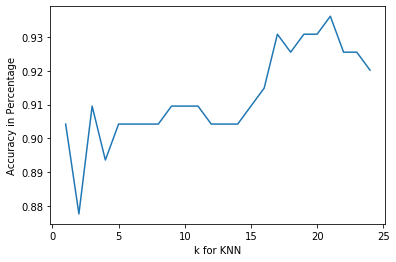

In [181]:
plt.plot(k_range,score_list)
plt.xlabel('k for KNN')
plt.ylabel('Accuracy in Percentage')

In [182]:
acc = accuracy_score(Y_test, y_pred)
print("Accuracy score using Logistic Regression:", acc*100)


Accuracy score using Logistic Regression: 92.02127659574468


### If we go over k=20, starts to decrease in accuracy
### 92% accuracy using perimeter and texture as features